In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
field = 'IDARADO2'

## Upload WCA file


In [5]:
df_wca = pd.read_csv('/home/dasxgo/developer/rock/WCA_2.csv')
data_major = 'OIL'
data_reservoir = 'WCA'
df_wca.insert(0, 'FIELD', field) 
df_wca.insert(1, 'MAJOR', data_major)
df_wca.insert(2, 'RESERVOIR', data_reservoir)
df_wca.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800


## Upload WCB file

In [6]:
df_wcb = pd.read_csv('/home/dasxgo/developer/rock/WCB_2.csv')
data_major = 'OIL'
data_reservoir = 'WCB'
df_wcb.insert(0, 'FIELD', field) 
df_wcb.insert(1, 'MAJOR', data_major)
df_wcb.insert(2, 'RESERVOIR', data_reservoir)
df_wcb.head()


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-05-01,1,31,2960,2731,6107
1,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-06-01,2,30,22900,20793,47279
2,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-07-01,3,31,23100,25215,47742
3,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-08-01,4,31,15346,23772,31752
4,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-09-01,5,30,12285,27857,25446


## Upload LSS file

In [7]:
df_lss = pd.read_csv('/home/dasxgo/developer/rock/LSS_2.csv')
data_major = 'OIL'
data_reservoir = 'LSS'
df_lss.insert(0, 'FIELD', field) 
df_lss.insert(1, 'MAJOR', data_major)
df_lss.insert(2, 'RESERVOIR', data_reservoir)
df_lss.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099


## **Flatflie**

In [8]:
df = pd.concat([df_lss,df_wca,df_wcb], ignore_index=True)
df['ProducingMonth'] = pd.to_datetime(df['ProducingMonth'])
df

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,IDARADO2,OIL,WCB,42-317-43108,8756,10461,CHEVRON,VLT WEATHERBY UNIT 0153WB,2022-06-01,18,30,4854,3621,4788
4806,IDARADO2,OIL,WCB,42-317-43108,8756,10461,CHEVRON,VLT WEATHERBY UNIT 0153WB,2022-07-01,19,31,3011,905,2941
4807,IDARADO2,OIL,WCB,42-317-43108,8756,10461,CHEVRON,VLT WEATHERBY UNIT 0153WB,2022-08-01,20,31,4612,4984,4457
4808,IDARADO2,OIL,WCB,42-317-43108,8756,10461,CHEVRON,VLT WEATHERBY UNIT 0153WB,2022-09-01,21,30,3541,3292,3387


## Data according to plan



In [9]:
well_planned = 5000
data_oil = df['LiquidsProd_BBL'] * (well_planned / df['LateralLength_FT']) * (30.4 / df['ProducingDays'])
data_gas = df['GasProd_MCF'] * (well_planned / df['LateralLength_FT']) * (30.4 / df['ProducingDays'])
data_water = df['WaterProd_BBL'] * (well_planned / df['LateralLength_FT']) * (30.4 / df['ProducingDays'])

df['OIL BBL'] = data_oil
df['GAS MCF'] = data_gas
df['WATER BBL'] = data_water

df['OIL BBL'] = np.array(df['OIL BBL'], np.int64)
df['GAS MCF'] = np.array(df['GAS MCF'], np.int64)
df['WATER BBL'] = np.array(df['WATER BBL'], np.int64)

df.head()

/home/dasxgo/mambaforge/envs/rock/lib/python3.11/site-packages/pandas/core/series.py:893: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self._values, dtype)


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL BBL,GAS MCF,WATER BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909,15226,4133,36892
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596,10373,8467,25207
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531,8785,5642,21414
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671,8483,4600,20738
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099,12296,7851,30147


## Type of Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIELD             4810 non-null   object        
 1   MAJOR             4810 non-null   object        
 2   RESERVOIR         4810 non-null   object        
 3   API_UWI           4810 non-null   object        
 4   TVD_FT            4810 non-null   int64         
 5   LateralLength_FT  4810 non-null   int64         
 6   ENVOperator       4810 non-null   object        
 7   WellName          4810 non-null   object        
 8   ProducingMonth    4810 non-null   datetime64[ns]
 9   TotalProdMonths   4810 non-null   int64         
 10  ProducingDays     4810 non-null   int64         
 11  LiquidsProd_BBL   4810 non-null   int64         
 12  GasProd_MCF       4810 non-null   int64         
 13  WaterProd_BBL     4810 non-null   int64         
 14  OIL BBL           4810 n

## **Data Cleansing**

## Check errors

key [</>] = 'OIL BBL' or 'GAS MCF' or 'WATER BBL"

In [11]:
df[df['OIL BBL'] == 0].count()

FIELD               11
MAJOR               11
RESERVOIR           11
API_UWI             11
TVD_FT              11
LateralLength_FT    11
ENVOperator         11
WellName            11
ProducingMonth      11
TotalProdMonths     11
ProducingDays       11
LiquidsProd_BBL     11
GasProd_MCF         11
WaterProd_BBL       11
OIL BBL             11
GAS MCF             11
WATER BBL           11
dtype: int64

## Cleanning Data


In [12]:
df.drop(df[(df['OIL BBL'] == 0)].index, inplace = True)
df.drop(df[(df['OIL BBL'] < 0)].index, inplace = True)



In [13]:
df.drop(df[(df['GAS MCF'] == 0)].index, inplace = True)
df.drop(df[(df['GAS MCF'] < 0)].index, inplace = True)

In [14]:
df.drop(df[(df['WATER BBL'] == 0)].index, inplace = True)
df.drop(df[(df['WATER BBL'] < 0)].index, inplace = True)

## Check cleanning

In [16]:
df[df['OIL BBL'] == 0].count()
df[df['OIL BBL'] < 0].count()

FIELD               0
MAJOR               0
RESERVOIR           0
API_UWI             0
TVD_FT              0
LateralLength_FT    0
ENVOperator         0
WellName            0
ProducingMonth      0
TotalProdMonths     0
ProducingDays       0
LiquidsProd_BBL     0
GasProd_MCF         0
WaterProd_BBL       0
OIL BBL             0
GAS MCF             0
WATER BBL           0
dtype: int64

In [17]:
df[df['GAS MCF'] == 0].count()
df[df['GAS MCF'] < 0].count()

FIELD               0
MAJOR               0
RESERVOIR           0
API_UWI             0
TVD_FT              0
LateralLength_FT    0
ENVOperator         0
WellName            0
ProducingMonth      0
TotalProdMonths     0
ProducingDays       0
LiquidsProd_BBL     0
GasProd_MCF         0
WaterProd_BBL       0
OIL BBL             0
GAS MCF             0
WATER BBL           0
dtype: int64

In [18]:
df[df['WATER BBL'] == 0].count()
df[df['WATER BBL'] < 0].count()

FIELD               0
MAJOR               0
RESERVOIR           0
API_UWI             0
TVD_FT              0
LateralLength_FT    0
ENVOperator         0
WellName            0
ProducingMonth      0
TotalProdMonths     0
ProducingDays       0
LiquidsProd_BBL     0
GasProd_MCF         0
WaterProd_BBL       0
OIL BBL             0
GAS MCF             0
WATER BBL           0
dtype: int64

## **Check Fatflie / Data Okay**

In [19]:
df

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL BBL,GAS MCF,WATER BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909,15226,4133,36892
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596,10373,8467,25207
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531,8785,5642,21414
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671,8483,4600,20738
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099,12296,7851,30147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,IDARADO2,OIL,WCB,42-317-43108,8756,10461,CHEVRON,VLT WEATHERBY UNIT 0153WB,2022-06-01,18,30,4854,3621,4788,2350,1753,2319
4806,IDARADO2,OIL,WCB,42-317-43108,8756,10461,CHEVRON,VLT WEATHERBY UNIT 0153WB,2022-07-01,19,31,3011,905,2941,1411,424,1378
4807,IDARADO2,OIL,WCB,42-317-43108,8756,10461,CHEVRON,VLT WEATHERBY UNIT 0153WB,2022-08-01,20,31,4612,4984,4457,2161,2336,2089
4808,IDARADO2,OIL,WCB,42-317-43108,8756,10461,CHEVRON,VLT WEATHERBY UNIT 0153WB,2022-09-01,21,30,3541,3292,3387,1715,1594,1640


## Normalization LSS - OIL BBL

In [28]:
df_lss = df[df['RESERVOIR'] == "LSS"]


## LSS OIL Visualization

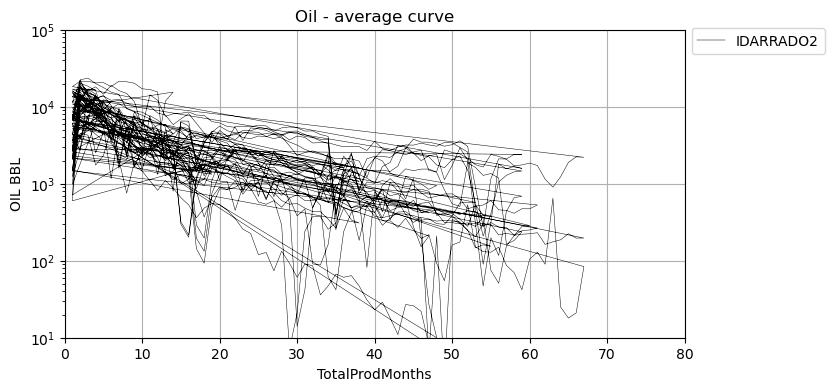

In [29]:
x = "TotalProdMonths"
y = "OIL BBL"

plt.figure(figsize=(8,4))
plt.plot(x,y, label='IDARRADO2', data=df_lss, linewidth=0.35, color="black", linestyle='-')
plt.title("Oil - average curve")
plt.xlabel("TotalProdMonths")
plt.ylabel("OIL BBL")
plt.yscale('log')
plt.grid(True)
plt.axis([0, 80, 10,100000])
plt.legend(loc="lower left", bbox_to_anchor=(1,0.9))

plt.show()

## **Datos Estadisticos**


In [21]:
df['OIL BBL']. describe()

count     4559.000000
mean      3631.524896
std       3893.816256
min          1.000000
25%        956.500000
50%       2291.000000
75%       4849.500000
max      33727.000000
Name: OIL BBL, dtype: float64

## Desviacion estandar

In [22]:
df['OIL BBL'].std()

3893.816256314445

## Rango

In [23]:
rango = df['OIL BBL'].max() - df['OIL BBL'].min()
rango

33726

## Quartiles

In [24]:
median = df['OIL BBL'].median()
Q1 = df["OIL BBL"].quantile(q=0.25)
Q3 = df["OIL BBL"].quantile(q=0.75)
min_val = df['OIL BBL'].quantile(q=0)
max_val = df['OIL BBL'].quantile(q=1)

print(min_val, Q1, median, Q3, max_val)

1.0 956.5 2291.0 4849.5 33727.0


## Rango inquartil

In [47]:
iqr = Q3 - Q1
iqr

3893.0

## Limte para deteccion de outliers

In [48]:
minlimit = Q1 - 1.5 * iqr
maxlimit = Q3 = 1.5 * iqr
print(minlimit,maxlimit )

-4883.0 5839.5


## Histogram OIL 

<AxesSubplot: xlabel='OIL BBL', ylabel='Count'>

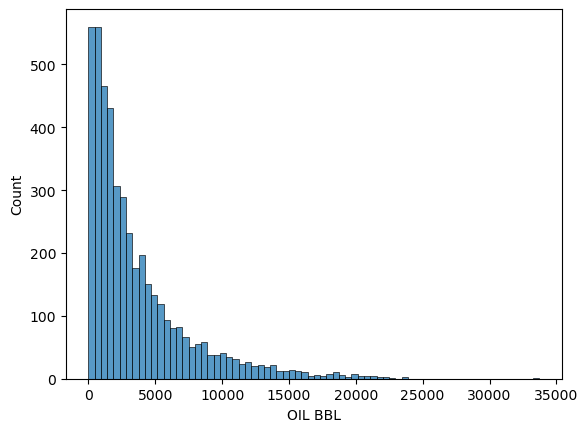

In [25]:
sns.histplot(df['OIL BBL'])

## Boxplot OIL 

<AxesSubplot: xlabel='OIL BBL'>

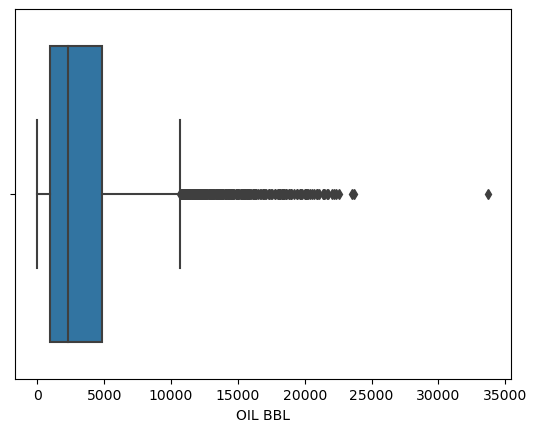

In [27]:
sns.boxplot(x=df['OIL BBL'])